In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker

In [2]:
# Display multiple columns, common in high-dimensional space (add rows as well)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 20)

In [3]:
omssa_output = pd.read_csv("/Users/Viswa/Downloads/singleShot_Fusion-1552153703580/S288c_run.csv")

In [4]:
omssa_output.head() # Talk about different accessions?

,Spectrum number,Filename/id,Peptide,E-value,Mass,gi,Accession,Start,Stop,Defline,Mods,Charge,Theo Mass,P-value,NIST score
0,120,index=120,GSIDEQHPR,0.099394,1037.487,0,BL_ORD_ID:50,250,258,sp|P06169|PDC1_YEAST Pyruvate decarboxylase is...,NaN,2,1037.490,3.803824e-05,0
1,120,index=120,GSIDEQHPR,0.099394,1037.487,0,BL_ORD_ID:131,250,258,sp|P26263|PDC6_YEAST Pyruvate decarboxylase is...,NaN,2,1037.490,3.803824e-05,0
2,339,index=339,TSGRPIKGDSSAGGK,0.001174,1416.728,0,BL_ORD_ID:2647,176,190,sp|P47075|VTC4_YEAST Vacuolar transporter chap...,NaN,3,1416.731,5.359808e-07,0
3,421,index=421,TSGRPIKGDSSAGGK,0.035522,1416.729,0,BL_ORD_ID:2647,176,190,sp|P47075|VTC4_YEAST Vacuolar transporter chap...,NaN,2,1416.731,1.624232e-05,0
4,506,index=506,NEETSGEGGEDKNEPSSK,0.028961,1892.786,0,BL_ORD_ID:4527,76,93,sp|Q02776|TIM50_YEAST Mitochondrial import inn...,NaN,3,1892.789,1.991815e-05,0


In [5]:
omssa_output.columns

Index(['Spectrum number', ' Filename/id', ' Peptide', ' E-value', ' Mass',
       ' gi', ' Accession', ' Start', ' Stop', ' Defline', ' Mods', ' Charge',
       ' Theo Mass', ' P-value', ' NIST score'],
      dtype='object')

<bound method Figure.tight_layout of <Figure size 432x288 with 1 Axes>>

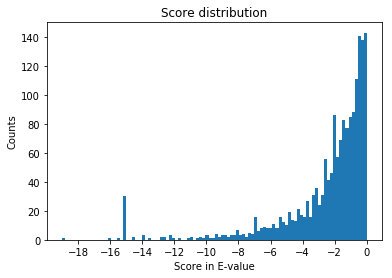

In [6]:
eps=1e-32 # To take care of zeoes
fig, ax = plt.subplots()
plt.hist(np.log10(eps + omssa_output[' E-value']), bins = 100)
loc = ticker.MultipleLocator(base=2) # thanks again to google!
ax.xaxis.set_major_locator(loc)
ax.set_xlabel('Score in E-value')
ax.set_ylabel('Counts')
ax.set_title('Score distribution')
fig.tight_layout

In [7]:
# Add IsMod column to see where oxidation is
omssa_output[' IsMod'] = omssa_output[' Mods'].str.match('oxidation', na=False)

In [8]:
mods_only = omssa_output[omssa_output[' IsMod'].values]
mods_only.head()

,Spectrum number,Filename/id,Peptide,E-value,Mass,gi,Accession,Start,Stop,Defline,Mods,Charge,Theo Mass,P-value,NIST score,IsMod
55,729,index=729,SKQEASQmAAmAEK,0.003606,1540.685,0,BL_ORD_ID:6013,655,668,sp|P32589|HSP7F_YEAST Heat shock protein homol...,"oxidation of M:8 ,oxidation of M:11",2,1540.687,0.000002,0,True
91,1001,index=1001,YATmTGHHVER,0.023147,1316.591,0,BL_ORD_ID:4636,70,80,"sp|P09436|SYIC_YEAST Isoleucine--tRNA ligase, ...",oxidation of M:4,3,1316.593,0.000011,0,True
92,1005,index=1005,YATmTGHHVER,0.006636,1316.593,0,BL_ORD_ID:4636,70,80,"sp|P09436|SYIC_YEAST Isoleucine--tRNA ligase, ...",oxidation of M:4,2,1316.593,0.000003,0,True
243,1754,index=1754,TPAEmSRPATTTR,0.490255,1433.174,0,BL_ORD_ID:3809,1361,1373,sp|P19097|FAS2_YEAST Fatty acid synthase subun...,oxidation of M:5,3,1433.695,0.000236,0,True
255,1823,index=1823,TPAEmSRPATTTR,0.517651,1433.690,0,BL_ORD_ID:3809,1361,1373,sp|P19097|FAS2_YEAST Fatty acid synthase subun...,oxidation of M:5,3,1433.695,0.000250,0,True


In [9]:
# Add a length column that represents the length of the peptide
omssa_output[' Length'] = omssa_output[' Peptide'].apply(len)

In [10]:
# Add a IsReverse column to represent if the hit is from target database or the decoy database
omssa_output[' IsReverse'] = omssa_output[' Defline'].str.match('###REV###')

In [11]:
Reverse_yeast_hits_only = omssa_output[omssa_output[' IsReverse'].values]

In [12]:
Reverse_yeast_hits_only.head()

,Spectrum number,Filename/id,Peptide,E-value,Mass,gi,Accession,Start,Stop,Defline,Mods,Charge,Theo Mass,P-value,NIST score,IsMod,Length,IsReverse
75,872,index=872,QETASNKPLKLYSCITR,0.456971,2007.920,0,BL_ORD_ID:9855,835,851,###REV###sp|Q08387|DNLI4_YEAST Reverse sequenc...,NaN,3,2008.042,0.000310,0,False,17,True
117,1103,index=1103,RTLEPTSLGGLIEVLR,0.574082,1753.787,0,BL_ORD_ID:11219,659,674,###REV###sp|P38850|RT107_YEAST Reverse sequenc...,NaN,3,1753.010,0.000363,0,False,16,True
131,1179,index=1179,KASLLILDDHSDDNK,0.381089,1682.339,0,BL_ORD_ID:10482,630,644,###REV###sp|Q06673|ECM30_YEAST Reverse sequenc...,NaN,3,1682.848,0.000249,0,False,15,True
167,1375,index=1375,KASLLILDDHSDDNK,0.378321,1683.785,0,BL_ORD_ID:10482,630,644,###REV###sp|Q06673|ECM30_YEAST Reverse sequenc...,NaN,3,1682.848,0.000248,0,False,15,True
595,3081,index=3081,DAAQVAEEVDDER,0.733552,1443.671,0,BL_ORD_ID:11559,428,440,###REV###sp|P46367|ALDH4_YEAST Reverse sequenc...,NaN,3,1445.628,0.000367,0,False,13,True


<bound method Figure.tight_layout of <Figure size 432x288 with 1 Axes>>

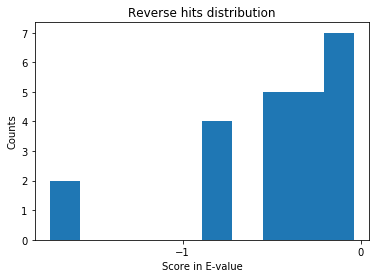

In [13]:
# All reverse hits seem to be in 0 to -2 region, which is expected.
eps=1e-32 # To take care of zeoes
fig, ax = plt.subplots()
plt.hist(np.log10(eps + Reverse_yeast_hits_only[' E-value']))
loc = ticker.MultipleLocator(base=1) # thanks again to google!
ax.xaxis.set_major_locator(loc)
ax.set_xlabel('Score in E-value')
ax.set_ylabel('Counts')
ax.set_title('Reverse hits distribution')
fig.tight_layout

In [14]:
subset_yeast_hits_only = omssa_output[~omssa_output[' IsReverse'].values] # See the tilde sign
# Here, we skip the step of filtering the target yeast hits within a FDR (usual norm is to use 1% or these days, even lower at 0.5% FDR)
# Instead we use a simple cut-off. Since we know all the reverse hits are less than 1e-2, we use target hits, that are less than e-value of 1e-2
Target_yeast_hits_only = subset_yeast_hits_only[subset_yeast_hits_only[' E-value'] < 0.01]

<bound method Figure.tight_layout of <Figure size 432x288 with 1 Axes>>

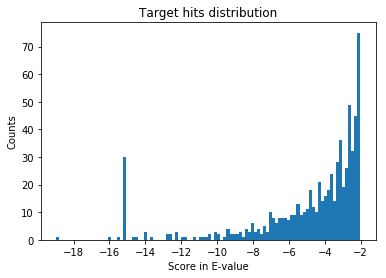

In [15]:
# All reverse hits seem to be in 0 to -2 region, which is expected.
eps=1e-32 # To take care of zeoes
fig, ax = plt.subplots()
plt.hist(np.log10(eps + Target_yeast_hits_only[' E-value']), bins = 100)
loc = ticker.MultipleLocator(base=2) # thanks again to google!
ax.xaxis.set_major_locator(loc)
ax.set_xlabel('Score in E-value')
ax.set_ylabel('Counts')
ax.set_title('Target hits distribution')
fig.tight_layout

In [16]:
Target_yeast_hits_only.head()

,Spectrum number,Filename/id,Peptide,E-value,Mass,gi,Accession,Start,Stop,Defline,Mods,Charge,Theo Mass,P-value,NIST score,IsMod,Length,IsReverse
2,339,index=339,TSGRPIKGDSSAGGK,1.173798e-03,1416.728,0,BL_ORD_ID:2647,176,190,sp|P47075|VTC4_YEAST Vacuolar transporter chap...,NaN,3,1416.731,5.359808e-07,0,False,15,False
30,549,index=549,SRGESDDSLNR,1.937602e-03,1234.551,0,BL_ORD_ID:877,61,71,sp|Q3E754|RS21B_YEAST 40S ribosomal protein S2...,NaN,2,1234.554,8.562092e-07,0,False,11,False
31,549,index=549,SRGESDDSLNR,1.937602e-03,1234.551,0,BL_ORD_ID:900,61,71,sp|P0C0V8|RS21A_YEAST 40S ribosomal protein S2...,NaN,2,1234.554,8.562092e-07,0,False,11,False
33,583,index=583,ANSDCNDKTDCNANNDCSNESDCNAK,9.257848e-04,2992.052,0,BL_ORD_ID:3714,581,606,sp|Q08732|HRK1_YEAST Serine/threonine-protein ...,NaN,3,2992.055,9.848775e-07,0,False,26,False
35,632,index=632,TKTHDVGDEGGNESTKPK,1.004113e-10,1898.900,0,BL_ORD_ID:6470,645,662,sp|P47116|PTK2_YEAST Serine/threonine-protein ...,NaN,3,1898.898,6.291435e-14,0,False,18,False


<bound method Figure.tight_layout of <Figure size 432x288 with 1 Axes>>

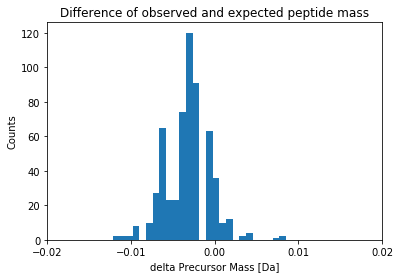

In [17]:
fig, ax = plt.subplots()
plt.hist(Target_yeast_hits_only[' Mass'] - Target_yeast_hits_only[' Theo Mass'], bins = 5000)
loc = ticker.MultipleLocator(base=0.01) # thanks again to google!
ax.xaxis.set_major_locator(loc)
ax.set_xlabel('delta Precursor Mass [Da]')
ax.set_ylabel('Counts')
ax.set_xlim([-0.02, 0.02])
ax.set_title("Difference of observed and expected peptide mass")
fig.tight_layout

<bound method Figure.tight_layout of <Figure size 432x288 with 1 Axes>>

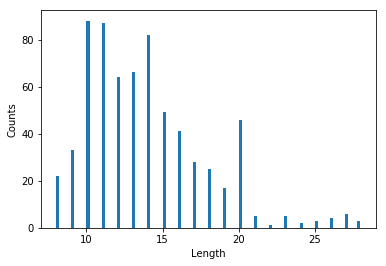

In [18]:
Target_yeast_hits_only[' Length'].astype('category')
fig, ax = plt.subplots()
plt.hist(Target_yeast_hits_only[' Length'], bins = 100)
loc = ticker.MultipleLocator(base=5) # thanks again to google!
ax.xaxis.set_major_locator(loc)
ax.set_xlabel('Length')
ax.set_ylabel('Counts')
fig.tight_layout

<bound method Figure.tight_layout of <Figure size 432x288 with 1 Axes>>

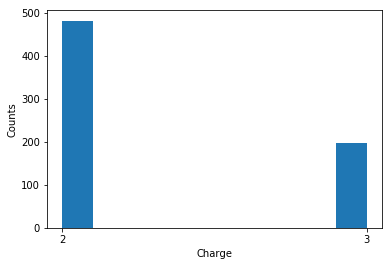

In [19]:
fig, ax = plt.subplots()
plt.hist(Target_yeast_hits_only[' Charge'])
loc = ticker.MultipleLocator(base=1) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
ax.set_xlabel('Charge')
ax.set_ylabel('Counts')
fig.tight_layout

In [41]:
group_by_protein = Target_yeast_hits_only.groupby(' Defline')[' Peptide'].value_counts().sort_values(ascending=False)

In [43]:
group_by_protein.head()


 Defline                                                                                                                                   Peptide     
sp|P00950|PMG1_YEAST Phosphoglycerate mutase 1 OS=Saccharomyces cerevisiae (strain ATCC 204508 / S288c) OX=559292 GN=GPM1 PE=1 SV=3       HGQSEWNEK        8
                                                                                                                                          AGELLKEK         7
sp|P17076|RL8A_YEAST 60S ribosomal protein L8-A OS=Saccharomyces cerevisiae (strain ATCC 204508 / S288c) OX=559292 GN=RPL8A PE=1 SV=4     SKQDASPKPYAVK    5
sp|P29453|RL8B_YEAST 60S ribosomal protein L8-B OS=Saccharomyces cerevisiae (strain ATCC 204508 / S288c) OX=559292 GN=RPL8B PE=1 SV=3     SKQDASPKPYAVK    5
sp|P0C2H7|RL27B_YEAST 60S ribosomal protein L27-B OS=Saccharomyces cerevisiae (strain ATCC 204508 / S288c) OX=559292 GN=RPL27B PE=1 SV=1  KVVIVKPHDEGSK    4
Name:  Peptide, dtype: int64